<a href="https://www.kaggle.com/code/lydia70/time-series-analysis-netflix-stock-price?scriptVersionId=177662788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-with-indicators/nflx_2014_2023.csv


In [2]:
#Import Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Analysis with Netflix Stock Prices

Hello and welcome to this notebook! 
These days, notifications are awaiting from the iconic red N of Netflix, beckoning us to embark on a journey of entertainment. Analyzing your viewing history and preferences, the platform's algorithms work tirelessly behind the scenes to give personalized recommendations tailored to our taste.
Netflix was founded in 1997 as a DVD-by-mail service. The company went public on May 23, 2002,when it opened at a split-adjusted price of 1.16 dollars.
In this notebook, I examine and predict the Netflix Stock Prices. First of all, I explore the data. Then, I continue with a time series analysis.

In [3]:
path = '/kaggle/input/netflix-stock-price-with-indicators/nflx_2014_2023.csv'

df = pd.read_csv(path)
df.head(5)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002


In [4]:
df.tail(5)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
2511,2023-12-22,494.000000,496.019989,485.450012,486.760010,2701100,61.286700,62.629263,42.406864,87.904519,443.339799,451.651874,425.729399,432.159056,11.455084,471.507500,10.569977,11.260790,10.724453,491.190002
2512,2023-12-26,489.390015,491.480011,486.380005,491.190002,2034500,65.324458,64.613544,31.476352,76.722042,446.049999,453.202389,426.331299,433.327986,11.575034,472.108499,5.100006,10.380678,10.322707,491.790009
2513,2023-12-27,491.239990,494.019989,489.250000,491.790009,2561300,65.886676,64.885498,54.412289,74.696489,448.669399,454.715629,426.933199,434.485650,11.584966,472.748000,4.769989,9.579151,9.926084,490.510010
2514,2023-12-28,492.000000,492.890015,489.070007,490.510010,1710500,63.331047,63.759744,-14.020755,61.870371,451.365199,456.119330,427.430699,435.595043,11.358617,473.414000,3.820008,8.756417,9.489936,486.880005
2515,2023-12-29,490.369995,492.230011,481.940002,486.880005,2739500,56.127883,60.551251,-157.815293,32.706720,454.178999,457.325631,427.916499,436.610587,10.762262,474.059500,10.290009,8.975501,9.547084,468.500000


In [5]:
df.dtypes

date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
rsi_7             float64
rsi_14            float64
cci_7             float64
cci_14            float64
sma_50            float64
ema_50            float64
sma_100           float64
ema_100           float64
macd              float64
bollinger         float64
TrueRange         float64
atr_7             float64
atr_14            float64
next_day_close    float64
dtype: object

In [6]:
df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,274.455767,278.638946,270.124592,274.487023,1.049230e+07,53.399584,53.424079,11.920763,15.705041,270.416745,270.522273,266.760420,266.813442,1.151103,272.865067,9.249735,9.231142,9.206930,274.652630
std,166.005094,168.205188,163.612279,165.902954,9.173072e+06,17.763862,13.088270,100.831995,111.396602,164.404981,163.454752,163.189487,161.050027,9.655979,165.259896,8.414224,6.141865,5.898383,165.888569
min,44.605713,45.842857,42.785713,44.887142,1.144000e+06,4.374756,9.152344,-233.333333,-424.012878,49.679943,49.409771,46.385428,46.650698,-59.233806,47.643571,0.599998,1.090197,1.206072,44.887142
25%,109.982502,111.887501,107.117498,110.064998,5.017050e+06,40.015924,43.731175,-74.565801,-71.870319,107.627900,105.923105,105.662982,102.490532,-1.929731,106.655000,3.102141,3.349633,3.351988,110.122497
50%,288.000000,292.690002,282.660004,288.229995,7.795950e+06,53.953919,53.668026,25.632766,27.165946,286.034599,287.382611,287.634151,291.379066,1.535425,284.444750,7.830006,9.445428,9.852787,288.284988
75%,384.542511,391.317505,377.795006,384.560005,1.299060e+07,67.151119,63.378696,94.212764,100.321908,376.592201,381.284113,365.740875,369.343945,5.693881,380.708376,12.715011,13.227332,13.211536,384.857491
max,692.349976,700.989990,686.090027,691.690002,1.333875e+08,96.305710,91.547868,233.333333,356.795719,648.592997,642.765550,616.771798,610.750059,24.347344,672.126996,136.099990,35.221811,27.809882,691.690002


In [7]:
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

# Create a Stock Price Time Series Data Frame

There are no missing values. The dataset contains 4 different stock prices: opening price, high price, low price, and closing price. The term stock price refers to the current price a share is trading on the market. The average price during the day is the typical stock price. Investors prefer to use the typical price over the closing price; the typical price is seen as a purer simple moving average. The typical price is the low price, high price and the closing price divided by 3. I create a time series data frame for date and typical stock price.

In [8]:
#typical stock price equals the average of the high, low, and close price
df['typical'] = df[['high', 'low','close']].mean(axis=1)

In [9]:
df_timeseries = df[['date','typical']]

In [10]:
df_timeseries.head(5)

,date,typical
0,2014-01-02,51.961905
1,2014-01-03,52.069999
2,2014-01-06,51.295714
3,2014-01-07,48.783810
4,2014-01-08,48.737619


In [11]:
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])
df_timeseries.dtypes

/tmp/ipykernel_18/594626411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])


date       datetime64[ns]
typical           float64
dtype: object

In [12]:
df_timeseries.set_index('date', inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


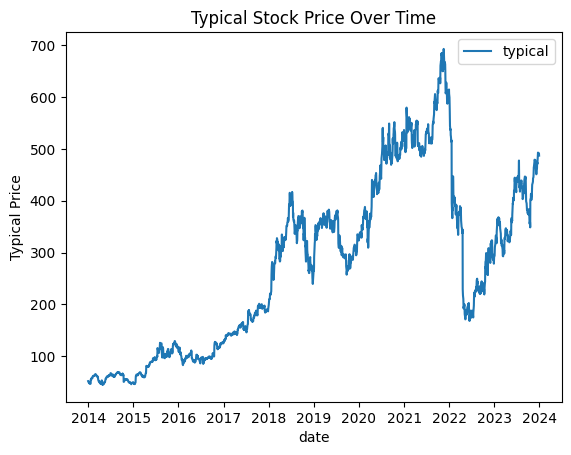

In [13]:
sns.lineplot(df_timeseries)
plt.ylabel('Typical Price')
plt.title('Typical Stock Price Over Time')
 
plt.show()

The typical stock price peaked during the years of covid-19 and dropped in 2022. I resample the time series data by month; this is to ensure that the data is distributed with a consisten frequency. As we see earlier in this notebook, all weekends are excluded from the data. There are approximately 252 trading days in a year. I resample the data by month.

In [14]:
#resample bij month
monthly_data = df_timeseries.resample('M').mean()

/tmp/ipykernel_18/1981362065.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_timeseries.resample('M').mean()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


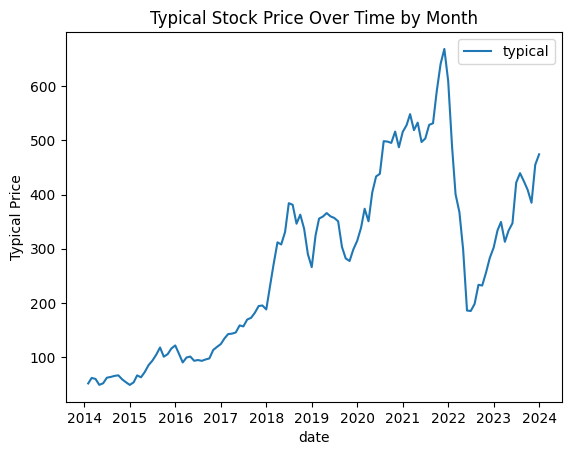

In [15]:
sns.lineplot(monthly_data)
plt.ylabel('Typical Price')
plt.title('Typical Stock Price Over Time by Month')
 
plt.show()

In [16]:
# Extract the time series values
ts_values = monthly_data['typical'].values  

# Perform ADF test
result = adfuller(ts_values)

# Print the test result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.5383953705790747
p-value: 0.5144394812928311
Critical Values:
	1%: -3.4870216863700767
	5%: -2.8863625166643136
	10%: -2.580009026141913


The conclusion is that the time series is not stationary. The Augmented Dickey-Fuller (ADF) test is a common statistical test used to determine whether a given time series is stationary or not.
If the absolute value of the ADF statistic is greater than the critical values, then the null hypothesis of the time series to be non-stationary is rejected. In this case, we fail to reject the null hypothesis. Now, let's take a look at a smaller subset of the data. I drop every date before 2018. So the data ranges from 2018 till the end of 2023.

In [17]:
# Assuming your DataFrame is named df
# Assuming you want to drop dates within a specific range, defined by start_date and end_date

# Create a boolean mask for dates within the range
start_date = "2018-01-01"
end_date = "2023-12-31"
mask = (df_timeseries.index > start_date) 

# Apply the mask to filter the DataFrame
df_timeseries_filtered = df_timeseries[mask]

# Print the filtered DataFrame
print(df_timeseries_filtered.head(5))

               typical
date                  
2018-01-02  199.380000
2018-01-03  204.253337
2018-01-04  205.560003
2018-01-05  208.533335
2018-01-08  210.996668


In [18]:
df_timeseries_filtered.tail(5)

,typical
date,
2023-12-22,489.410004
2023-12-26,489.683339
2023-12-27,491.686666
2023-12-28,490.823344
2023-12-29,487.016673


In [19]:
#resample bij month
df_timeseries_filtered_monthly = df_timeseries_filtered.resample('M').mean()

/tmp/ipykernel_18/3748759148.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_timeseries_filtered_monthly = df_timeseries_filtered.resample('M').mean()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


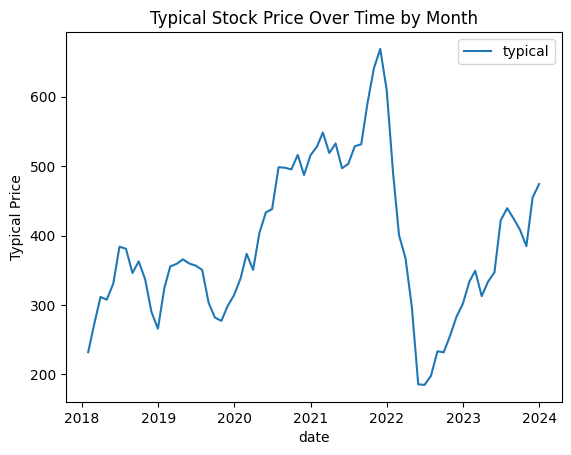

In [20]:
sns.lineplot(df_timeseries_filtered_monthly)
plt.ylabel('Typical Price')
plt.title('Typical Stock Price Over Time by Month')
 
plt.show()

In [21]:
# Extract the time series values
ts_values_2 = df_timeseries_filtered_monthly['typical'].values  

# Perform ADF test
reslt = adfuller(ts_values_2)

# Print the test result
print('ADF Statistic:', reslt[0])
print('p-value:', reslt[1])
print('Critical Values:')
for key, value in reslt[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -2.319506871149449
p-value: 0.16575377509880757
Critical Values:
	1%: -3.5274258688046647
	5%: -2.903810816326531
	10%: -2.5893204081632653


Still, I fail to reject the null hypothesis of non-stationarity. Compared to previous results, there is some evidence towards stationarity. 

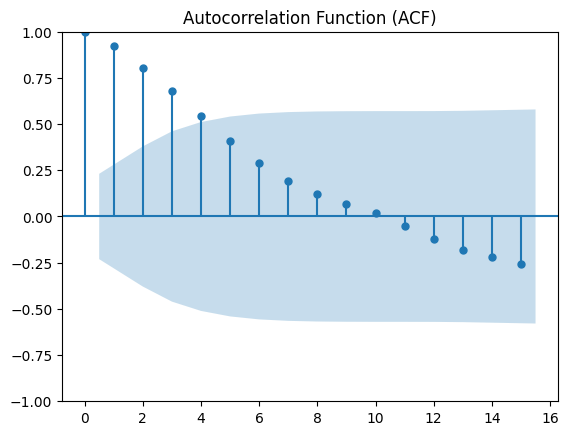

In [22]:
# Assuming your time series data is stored in a Series named 'ts'
# Plot ACF
plot_acf(ts_values_2, lags=15)
plt.title('Autocorrelation Function (ACF)')
plt.show()

Let's take a look at the autocorrelation function plot. This plot assesses how much the current value of a series depends on its past values. The plot reveals a decaying pattern untill it reaches 10 lags. The first 4 lags have a coefficients outside the shaded region; this indicate statistically significant correlations. 

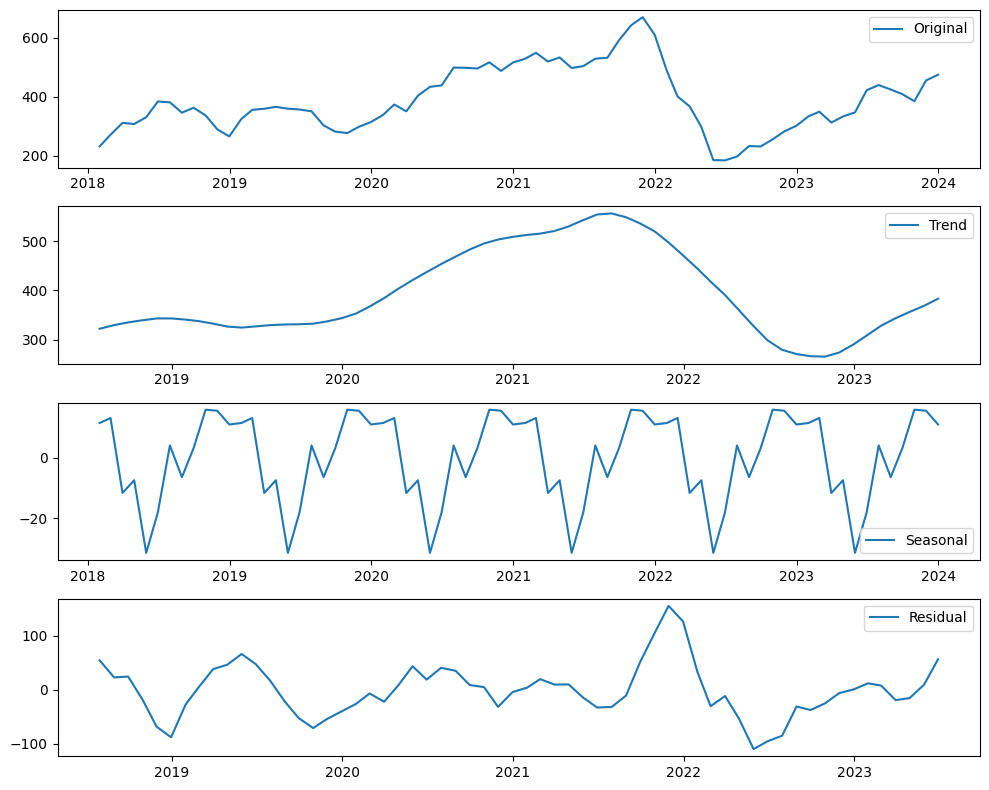

In [23]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df_timeseries_filtered_monthly, model='additive')

# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(411)
plt.plot(df_timeseries_filtered_monthly, label='Original')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30664D+00    |proj g|=  8.27071D-02

At iterate    5    f=  4.25549D+00    |proj g|=  7.79418D-03


 This problem is unconstrained.



At iterate   10    f=  4.24591D+00    |proj g|=  2.61777D-02

At iterate   15    f=  4.22850D+00    |proj g|=  2.81418D-03

At iterate   20    f=  4.22744D+00    |proj g|=  2.23590D-03

At iterate   25    f=  4.22722D+00    |proj g|=  8.28840D-04

At iterate   30    f=  4.22719D+00    |proj g|=  4.23650D-04

At iterate   35    f=  4.22718D+00    |proj g|=  1.12143D-04

At iterate   40    f=  4.22718D+00    |proj g|=  7.00513D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     48      1     0     0   7.005D-05   4.227D+00
  F =   4.2271818481184606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

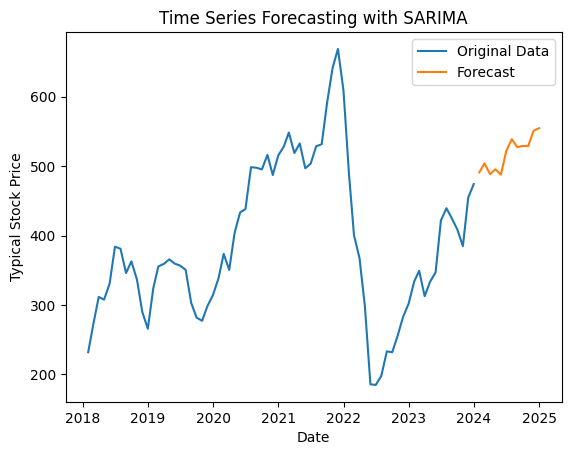

In [24]:
# Assuming your time series data is in a column named 'stock_price'
ts = df_timeseries_filtered_monthly['typical']

# Define and fit the SARIMA model
model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast future values
forecast = results.forecast(steps=12)  # Forecast for a year

# Plot the original data and the forecast
plt.plot(ts.index, ts, label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Typical Stock Price')
plt.title('Time Series Forecasting with SARIMA')
plt.legend()
plt.show()


The prediction is that the stock price goes up in 2025. 


**Thanks for opening this notebook!**